# imports

In [1]:
from DataHandler import DataHandler
from Statistics import Statistics, Statistics2
from Utils import Utils, ModelUtils

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import imageio
import os
from scipy import stats
from typing import Tuple, Dict


# load data

In [2]:
file_path = "Data/SPY_Options_log.txt"
dh = DataHandler()

df = dh.parse_file(file_path=file_path)
df = dh.get_basic_data(df)
df

c:\Users\mbeckhusen\Documents\VolaSurfer\Utils.py:9: RuntimeWarning: invalid value encountered in sqrt
  d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
c:\Users\mbeckhusen\Documents\VolaSurfer\Utils.py:10: RuntimeWarning: invalid value encountered in sqrt
  d2 = d1 - sigma * np.sqrt(T)
c:\Users\mbeckhusen\Documents\VolaSurfer\Utils.py:121: RuntimeWarning: invalid value encountered in sqrt
  d1 = (np.log(S/K) + (r + 0.5 * np.power(sigma, 2)) * T) / sigma *np.sqrt(T)
c:\Users\mbeckhusen\Documents\VolaSurfer\Utils.py:122: RuntimeWarning: invalid value encountered in sqrt
  vg = S * norm.pdf(d1, 0.0, 1.0) * np.sqrt(T)


,timestamp,ticker_option,maturity,strike,option_type,bid_open,bid_high,bid_low,bid_close,ask_open,...,close,volume,bid_mid,ask_mid,mid_price,T,days_to_expiry,implied_volatility,log_strike,vega
0,2023-01-04 06:30:00,SPY,2023-01-20,364.0,Call,19.79,24.36,17.02,18.99,24.79,...,380.82,66519705.0,19.390,22.485,20.9375,0.043094,15.729167,0.314915,0.954827,31.521391
1,2023-01-04 06:30:00,SPY,2023-01-20,365.0,Call,18.93,23.47,16.11,18.17,23.93,...,380.82,66519705.0,18.550,21.635,20.0925,0.043094,15.729167,0.310893,0.957571,31.522844
2,2023-01-04 06:30:00,SPY,2023-01-20,366.0,Call,18.08,22.60,15.36,17.37,23.08,...,380.82,66519705.0,17.725,20.765,19.2450,0.043094,15.729167,0.306440,0.960307,31.524227
3,2023-01-04 06:30:00,SPY,2023-01-20,367.0,Call,18.19,21.74,14.76,16.58,23.19,...,380.82,66519705.0,17.385,20.435,18.9100,0.043094,15.729167,0.321574,0.963035,31.526919
4,2023-01-04 06:30:00,SPY,2023-01-20,368.0,Call,17.02,20.88,14.05,15.81,22.02,...,380.82,66519705.0,16.415,19.450,17.9325,0.043094,15.729167,0.311165,0.965756,31.527759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45020,2023-11-06 06:30:00,SPY,2023-11-17,418.0,Put,1.31,1.31,0.65,0.71,1.32,...,434.69,88515231.0,1.010,1.020,1.0150,0.029395,10.729167,NaN,0.960848,NaN
45021,2023-11-06 06:30:00,SPY,2023-11-17,419.0,Put,1.44,1.44,0.70,0.77,1.45,...,434.69,88515231.0,1.105,1.115,1.1100,0.029395,10.729167,NaN,0.963238,NaN
45022,2023-11-06 06:30:00,SPY,2023-12-15,418.0,Call,18.66,23.03,18.66,20.86,19.52,...,434.69,88515231.0,19.760,21.350,20.5550,0.106107,38.729167,0.138812,0.960848,56.168015
45023,2023-11-06 06:30:00,SPY,2023-12-15,419.0,Call,16.87,22.21,16.87,20.01,18.39,...,434.69,88515231.0,18.440,20.355,19.3975,0.106107,38.729167,0.129109,0.963238,56.158085


In [3]:
df_call = df[df['option_type']=='Call']
df_call.columns

Index(['timestamp', 'ticker_option', 'maturity', 'strike', 'option_type',
       'bid_open', 'bid_high', 'bid_low', 'bid_close', 'ask_open', 'ask_high',
       'ask_low', 'ask_close', 'ticker_price', 'open', 'high', 'low', 'close',
       'volume', 'bid_mid', 'ask_mid', 'mid_price', 'T', 'days_to_expiry',
       'implied_volatility', 'log_strike', 'vega'],
      dtype='object')

In [4]:
df_call_advanced = dh.get_advanced_features(df=df_call, strike_bins=3)
df_call_advanced.head(-5)

               timestamp  expiry_bin  log_strike_bin option_type  \
0    2023-01-04 06:30:00           0               0        Call   
1    2023-01-04 06:30:00           0               1        Call   
2    2023-01-04 06:30:00           0               2        Call   
3    2023-01-04 06:30:00           1               0        Call   
4    2023-01-04 06:30:00           1               1        Call   
...                  ...         ...             ...         ...   
2102 2023-11-03 06:30:00           3               1        Call   
2103 2023-11-03 06:30:00           3               2        Call   
2104 2023-11-06 06:30:00           0               0        Call   
2105 2023-11-06 06:30:00           1               0        Call   
2106 2023-11-06 06:30:00           2               0        Call   

      binned_log_strike  implied_volatility  days_to_expiry  
0              0.968433            0.301368       15.729167  
1              0.999118            0.269392       15.729167

c:\Users\mbeckhusen\Documents\VolaSurfer\Utils.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_strike_bin'] = pd.cut(
c:\Users\mbeckhusen\Documents\VolaSurfer\Utils.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['expiry_bin'] = df['days_to_expiry'].apply(bin_expiry)


,timestamp,expiry_bin,log_strike_bin,option_type,binned_log_strike,implied_volatility,days_to_expiry
0,2023-01-04 06:30:00,0,0,Call,0.968433,0.301368,15.729167
1,2023-01-04 06:30:00,0,1,Call,0.999118,0.269392,15.729167
2,2023-01-04 06:30:00,0,2,Call,1.028902,0.240770,15.729167
3,2023-01-04 06:30:00,1,0,Call,0.968433,0.266556,43.729167
4,2023-01-04 06:30:00,1,1,Call,0.999118,0.247438,43.729167
...,...,...,...,...,...,...,...
2097,2023-11-03 06:30:00,0,2,Call,1.016666,0.119568,13.729167
2098,2023-11-03 06:30:00,1,0,Call,0.971102,0.101449,41.729167
2099,2023-11-03 06:30:00,1,1,Call,0.998196,0.112597,41.729167
2100,2023-11-03 06:30:00,1,2,Call,1.016666,0.121566,41.729167


# Plots heatmap of binned volatility
Note: if a bin does not exist, the plot will not show it

In [5]:
timestamps = df_call_advanced['timestamp'].unique()

for ts in timestamps:
    # Filter data for current timestamp
    ts_data = df_call_advanced[df_call_advanced['timestamp'] == ts]
    
    # Create pivot table for heatmap
    pivot_data = ts_data.pivot_table(
        values='implied_volatility',
        index='log_strike_bin',
        columns='expiry_bin',
        aggfunc='mean'
    )

In [ ]:
# colors = ['#f7fbff', '#deebf7', '#c6dbef', '#9ecae1', '#6baed6', '#4292c6', '#2171b5', '#084594']
# custom_cmap = LinearSegmentedColormap.from_list('custom_blues', colors)
# Create custom green to red colormap
colors = ['#2ecc71',  # bright green
          '#a8e6cf',  # light green
          '#f1f6a6',  # light yellow
          '#ffd3b6',  # light orange
          '#ffaaa5',  # light red
          '#ff8b94',  # medium red
          '#e74c3c']  # bright red
custom_cmap = LinearSegmentedColormap.from_list('custom_green_red', colors)

# Calculate global min and max for consistent color scaling
vmin = df_call_advanced['implied_volatility'].min()
vmax = df_call_advanced['implied_volatility'].max()

timestamps = df_call_advanced['timestamp'].unique()

for ts in timestamps:
    # Filter data for current timestamp
    ts_data = df_call_advanced[df_call_advanced['timestamp'] == ts]
    
    # Create pivot table for heatmap
    pivot_data = ts_data.pivot_table(
        values='implied_volatility',
        index='log_strike_bin',
        columns='expiry_bin',
        aggfunc='mean'
    )

    # Create figure
    plt.figure(figsize=(12, 8))

    # Create heatmap
    sns.heatmap(
        pivot_data,
        cmap=custom_cmap,
        annot=True,  # Show values in cells
        fmt='.3f',   # Format for the annotations
        cbar_kws={'label': 'Implied Volatility'},
        square=True,
        vmin=vmin,
        vmax=vmax
    )

    # Customize the plot
    plt.title(f'Implied Volatility Surface at {ts}\nVol Range: [{vmin:.3f}, {vmax:.3f}]')
    plt.xlabel('Expiry Bins')
    plt.ylabel('Log Strike Bins')

    # Add text explaining the bins
    bin_explanation = (
        "Expiry Bins:\n"
        "0: ≤ 25 days\n"
        "1: 26-50 days\n"
        "2: 51-75 days\n"
        "3: > 75 days"
    )
    plt.figtext(1.15, 0.6, bin_explanation, fontsize=8, bbox=dict(facecolor='white', alpha=0.8))

    # Adjust layout to prevent cutting off labels
    plt.tight_layout()
    plt.show()

In [8]:
subset = df_call_advanced[(df_call_advanced['log_strike_bin']==2) & (df_call_advanced['expiry_bin']==0)]
subset['implied_volatility'] = subset['implied_volatility'].dropna()
subset

C:\Users\mbeckhusen\AppData\Local\Temp\ipykernel_64244\3704070944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['implied_volatility'] = subset['implied_volatility'].dropna()


,timestamp,expiry_bin,log_strike_bin,option_type,binned_log_strike,implied_volatility,days_to_expiry
2,2023-01-04 06:30:00,0,2,Call,1.028902,0.240770,15.729167
11,2023-01-05 06:30:00,0,2,Call,1.025047,0.197424,14.729167
20,2023-01-06 06:30:00,0,2,Call,1.028851,0.245384,13.729167
29,2023-01-09 06:30:00,0,2,Call,1.017672,0.180612,10.729167
38,2023-01-10 06:30:00,0,2,Call,1.028497,0.233562,9.645833
...,...,...,...,...,...,...,...
2061,2023-10-30 06:30:00,0,2,Call,1.027163,0.206254,17.729167
2070,2023-10-31 06:30:00,0,2,Call,1.021205,0.163656,16.729167
2079,2023-11-01 06:30:00,0,2,Call,1.024317,0.157042,15.729167
2088,2023-11-02 06:30:00,0,2,Call,1.021847,0.136967,14.729167


<Axes: >

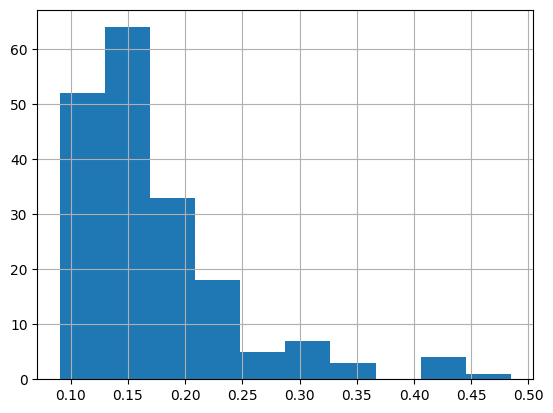

In [9]:
subset['implied_volatility'].hist()

In [10]:
subset['implied_volatility'].mean()

np.float64(0.17396558973563475)

In [11]:
subset['implied_volatility'].kurt()

np.float64(4.453345940397522)

In [12]:
subset['implied_volatility'].skew()

np.float64(1.9381390943681662)

# statistical plots: vol over time, vol of vol over time, histograms, and basic statistics

C:\Users\mbeckhusen\AppData\Local\Temp\ipykernel_64244\2830293491.py:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  self.data['iv_pct_change'] = self.data['implied_volatility'].pct_change()



Implied Volatility Analysis Statistics:
----------------------------------------
iv_mean             : 0.1740
iv_median           : 0.1557
iv_std              : 0.0700
iv_skew             : 1.9381
iv_kurtosis         : 4.4533
iv_changes_mean     : 0.0291
iv_changes_std      : 0.2480
iv_changes_skew     : 0.2412
iv_changes_kurtosis : 1.6138
vol_of_vol          : 3.9373
iv_range            : 0.3941
iv_iqr              : 0.0642
iv_95_percentile    : 0.3135
iv_5_percentile     : 0.1065


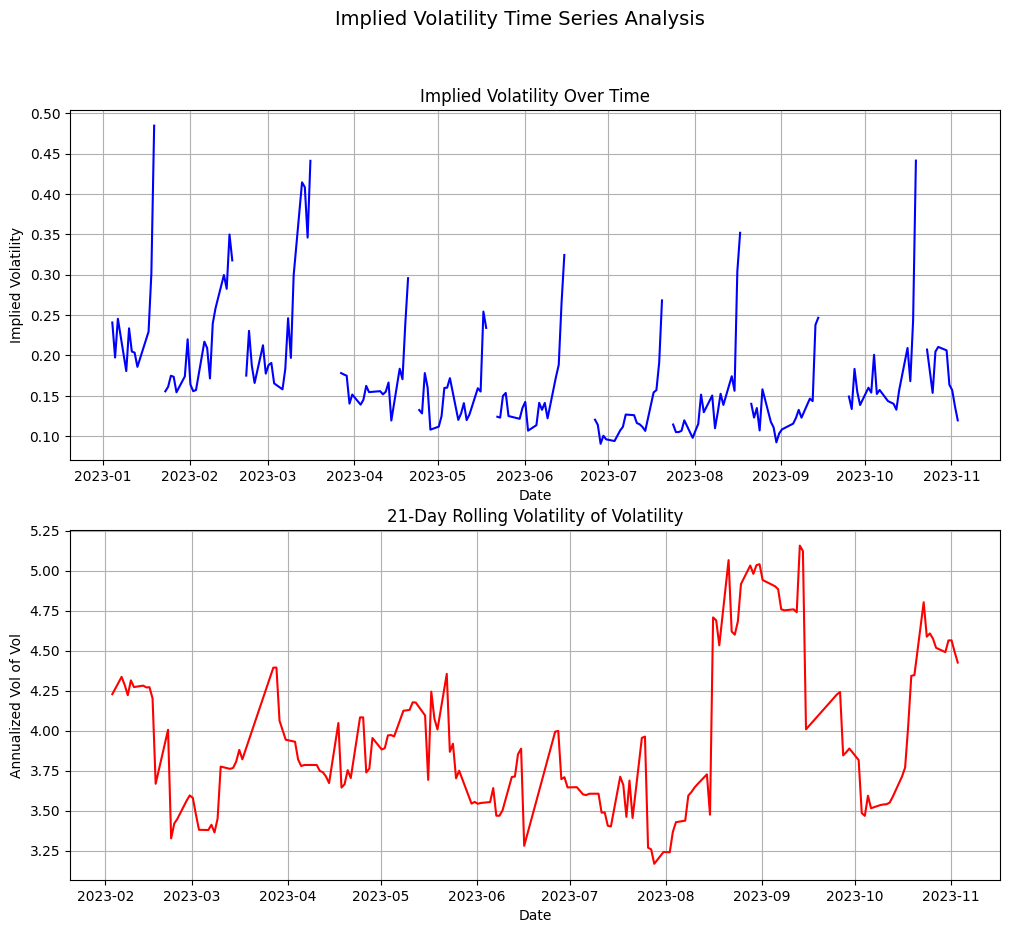

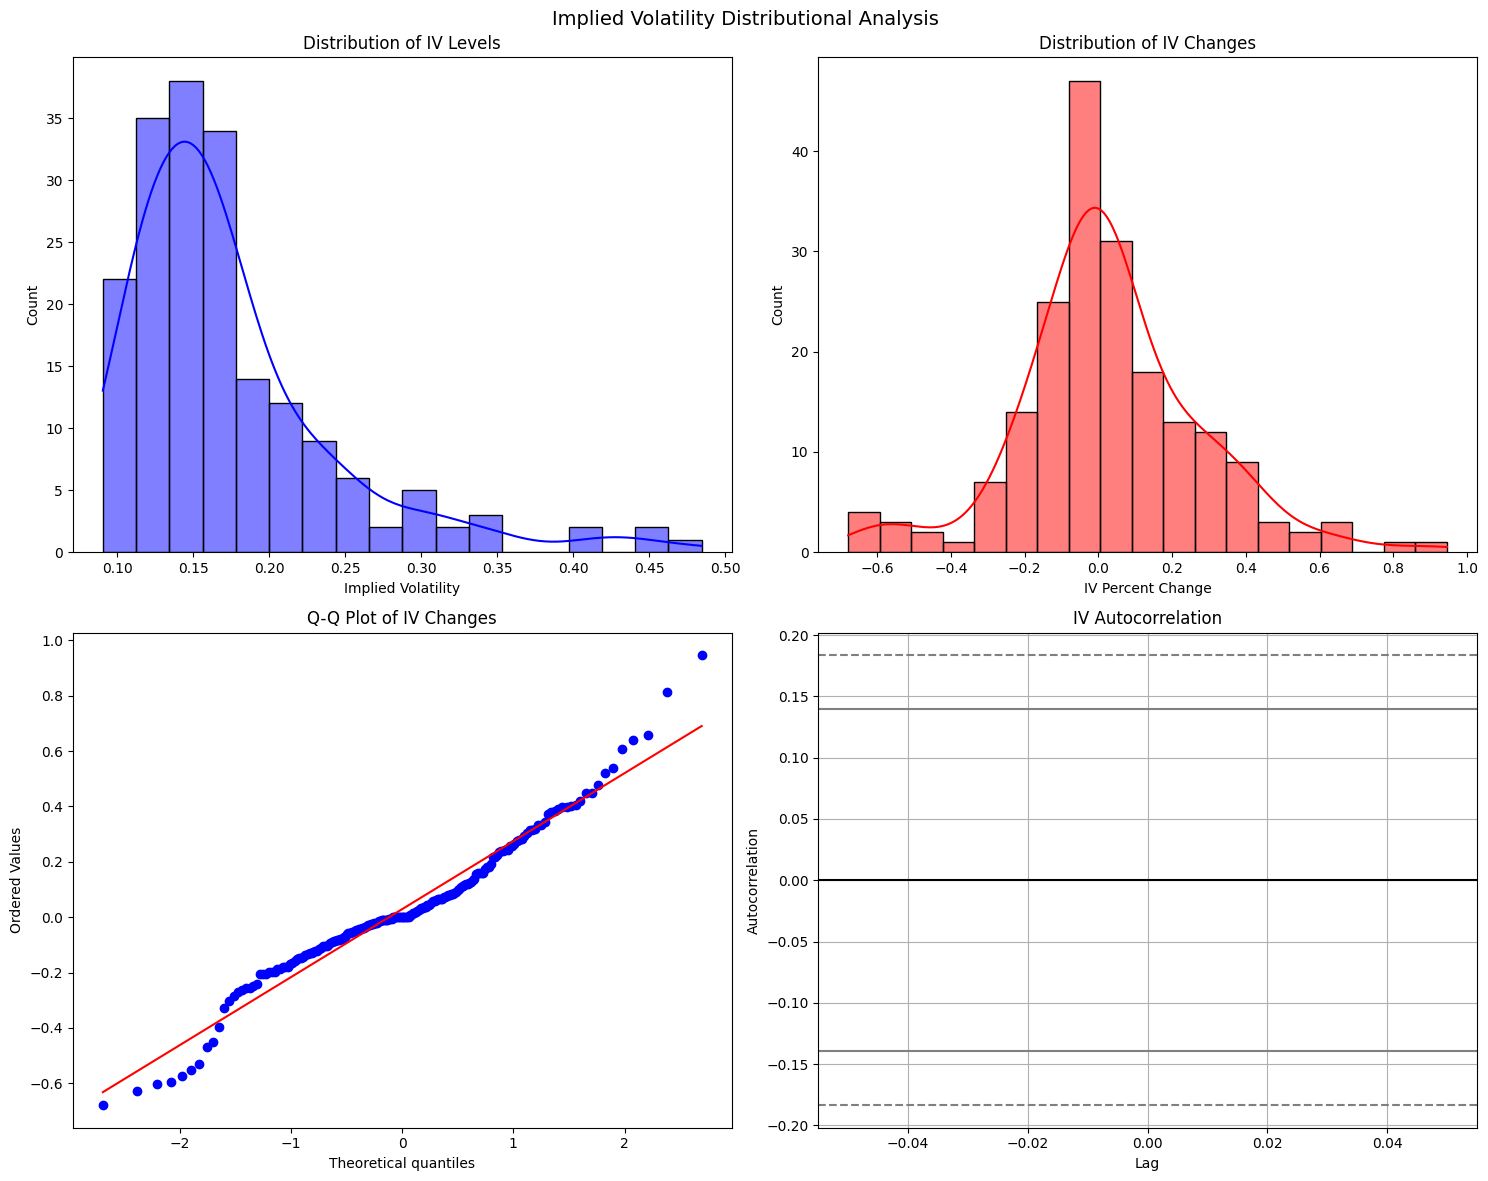

In [13]:
class IVAnalysis:
    def __init__(self, data: pd.DataFrame):
        """
        Initialize with IV time series data.
        
        Args:
            data: DataFrame with timestamp and implied_volatility columns
        """
        self.data = data.copy()
        self.data['iv_pct_change'] = self.data['implied_volatility'].pct_change()
        self.data['iv_abs_change'] = self.data['implied_volatility'].diff()
        
    def calculate_stats(self) -> Dict[str, float]:
        """Calculate key statistics for IV levels and changes."""
        iv = self.data['implied_volatility'].dropna()
        iv_changes = self.data['iv_pct_change'].dropna()
        
        stats_dict = {
            # IV Level Statistics
            'iv_mean': iv.mean(),
            'iv_median': iv.median(),
            'iv_std': iv.std(),
            'iv_skew': iv.skew(),
            'iv_kurtosis': iv.kurtosis(),
            
            # IV Changes Statistics
            'iv_changes_mean': iv_changes.mean(),
            'iv_changes_std': iv_changes.std(),
            'iv_changes_skew': iv_changes.skew(),
            'iv_changes_kurtosis': iv_changes.kurtosis(),
            
            # Volatility of Volatility
            'vol_of_vol': iv_changes.std() * np.sqrt(252),
            
            # Range Statistics
            'iv_range': iv.max() - iv.min(),
            'iv_iqr': stats.iqr(iv),
            
            # Extremes
            'iv_95_percentile': np.percentile(iv, 95),
            'iv_5_percentile': np.percentile(iv, 5)
        }
        
        return stats_dict

    def plot_analysis(self) -> Tuple[plt.Figure, plt.Figure]:
        """Create comprehensive visualization of IV analysis."""
        # Set up the first figure - Time series analysis
        fig1, axs1 = plt.subplots(2, 1, figsize=(12, 10))
        fig1.suptitle('Implied Volatility Time Series Analysis', fontsize=14)
        
        # Plot 1: IV levels over time
        axs1[0].plot(self.data['timestamp'], self.data['implied_volatility'], 
                     label='IV', color='blue')
        axs1[0].set_title('Implied Volatility Over Time')
        axs1[0].set_xlabel('Date')
        axs1[0].set_ylabel('Implied Volatility')
        axs1[0].grid(True)
        
        # Plot 2: Rolling vol of vol
        rolling_std = self.data['iv_pct_change'].rolling(window=21).std() * np.sqrt(252)
        axs1[1].plot(self.data['timestamp'], rolling_std, 
                     label='21D Rolling Vol of Vol', color='red')
        axs1[1].set_title('21-Day Rolling Volatility of Volatility')
        axs1[1].set_xlabel('Date')
        axs1[1].set_ylabel('Annualized Vol of Vol')
        axs1[1].grid(True)
        
        # Set up the second figure - Distributional analysis
        fig2, axs2 = plt.subplots(2, 2, figsize=(15, 12))
        fig2.suptitle('Implied Volatility Distributional Analysis', fontsize=14)
        
        # Plot 1: IV levels histogram
        sns.histplot(data=self.data, x='implied_volatility', ax=axs2[0,0], 
                    kde=True, color='blue')
        axs2[0,0].set_title('Distribution of IV Levels')
        axs2[0,0].set_xlabel('Implied Volatility')
        
        # Plot 2: IV changes histogram
        sns.histplot(data=self.data, x='iv_pct_change', ax=axs2[0,1], 
                    kde=True, color='red')
        axs2[0,1].set_title('Distribution of IV Changes')
        axs2[0,1].set_xlabel('IV Percent Change')
        
        # Plot 3: QQ plot of IV changes
        stats.probplot(self.data['iv_pct_change'].dropna(), dist="norm", 
                      plot=axs2[1,0])
        axs2[1,0].set_title('Q-Q Plot of IV Changes')
        
        # Plot 4: IV Autocorrelation
        pd.plotting.autocorrelation_plot(self.data['implied_volatility'], 
                                       ax=axs2[1,1])
        axs2[1,1].set_title('IV Autocorrelation')
        
        plt.tight_layout()
        return fig1, fig2
    
    def run_analysis(self) -> Tuple[Dict[str, float], Tuple[plt.Figure, plt.Figure]]:
        """Run complete analysis and return statistics and plots."""
        stats = self.calculate_stats()
        figs = self.plot_analysis()
        return stats, figs

# Run analysis on the subset data
def analyze_iv_data(subset):
    analyzer = IVAnalysis(subset)
    stats, (fig1, fig2) = analyzer.run_analysis()
    
    # Print formatted statistics
    print("\nImplied Volatility Analysis Statistics:")
    print("-" * 40)
    for key, value in stats.items():
        print(f"{key:20}: {value:.4f}")
    
    return stats, fig1, fig2

# Execute analysis
stats, fig1, fig2 = analyze_iv_data(subset)
plt.show()

# plots with distribution percentiles

C:\Users\mbeckhusen\AppData\Local\Temp\ipykernel_64244\1873774298.py:17: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  self.data['iv_pct_change'] = self.data['implied_volatility'].pct_change()



Implied Volatility Analysis Statistics:
----------------------------------------
iv_mean             : 0.1740
iv_median           : 0.1557
iv_std              : 0.0700
iv_skew             : 1.9381
iv_kurtosis         : 4.4533
iv_changes_mean     : 0.0291
iv_changes_std      : 0.2480
iv_changes_skew     : 0.2412
iv_changes_kurtosis : 1.6138
vol_of_vol          : 3.9373
iv_range            : 0.3941
iv_iqr              : 0.0642
iv_95_percentile    : 0.3135
iv_5_percentile     : 0.1065


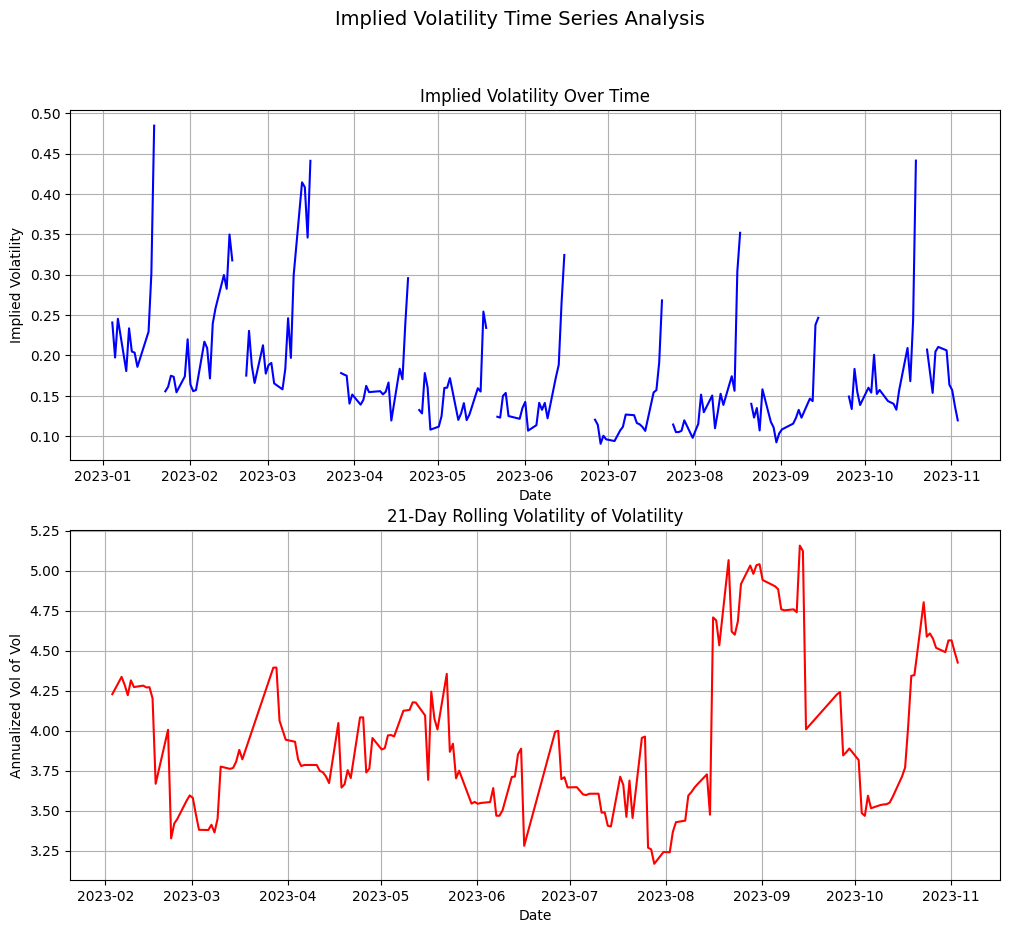

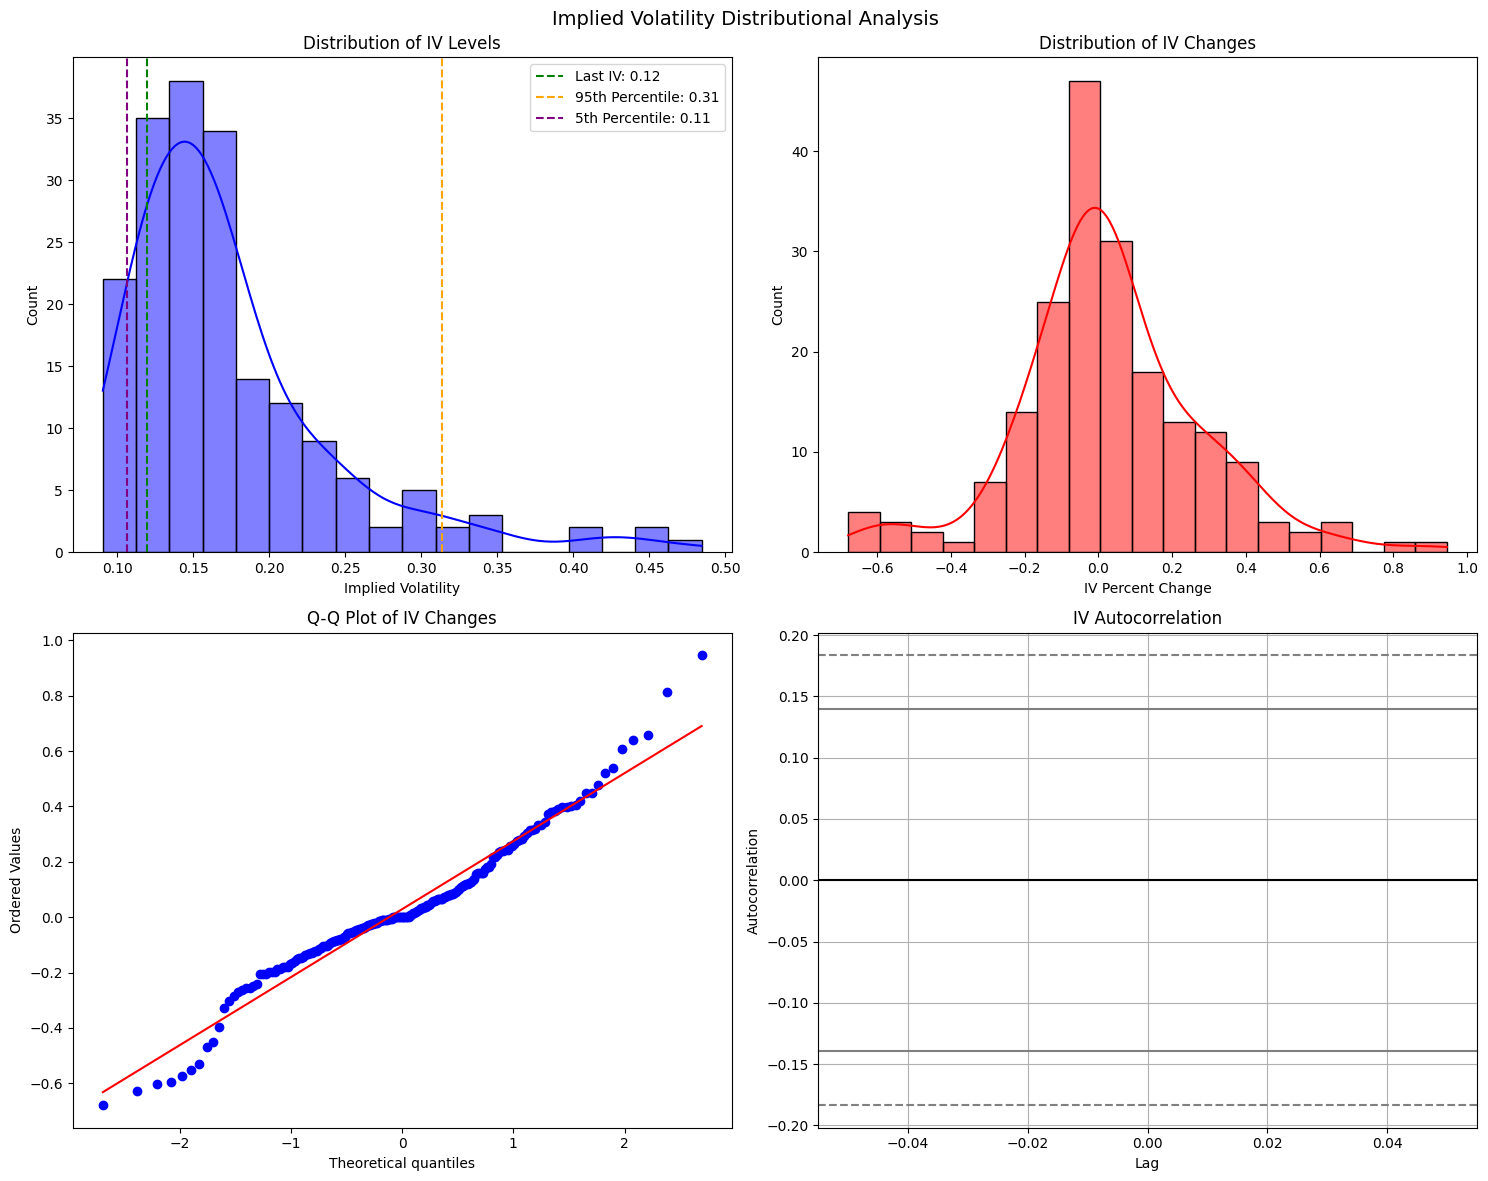

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from typing import Tuple, Dict

class IVAnalysis:
    def __init__(self, data: pd.DataFrame):
        """
        Initialize with IV time series data.
        
        Args:
            data: DataFrame with timestamp and implied_volatility columns
        """
        self.data = data.copy()
        self.data['iv_pct_change'] = self.data['implied_volatility'].pct_change()
        self.data['iv_abs_change'] = self.data['implied_volatility'].diff()
        
    def calculate_stats(self) -> Dict[str, float]:
        """Calculate key statistics for IV levels and changes."""
        iv = self.data['implied_volatility'].dropna()
        iv_changes = self.data['iv_pct_change'].dropna()
        
        stats_dict = {
            # IV Level Statistics
            'iv_mean': iv.mean(),
            'iv_median': iv.median(),
            'iv_std': iv.std(),
            'iv_skew': iv.skew(),
            'iv_kurtosis': iv.kurtosis(),
            
            # IV Changes Statistics
            'iv_changes_mean': iv_changes.mean(),
            'iv_changes_std': iv_changes.std(),
            'iv_changes_skew': iv_changes.skew(),
            'iv_changes_kurtosis': iv_changes.kurtosis(),
            
            # Volatility of Volatility
            'vol_of_vol': iv_changes.std() * np.sqrt(252),
            
            # Range Statistics
            'iv_range': iv.max() - iv.min(),
            'iv_iqr': stats.iqr(iv),
            
            # Extremes
            'iv_95_percentile': np.percentile(iv, 95),
            'iv_5_percentile': np.percentile(iv, 5)
        }
        
        return stats_dict

    def plot_analysis(self) -> Tuple[plt.Figure, plt.Figure]:
        """Create comprehensive visualization of IV analysis."""
        # Set up the first figure - Time series analysis
        fig1, axs1 = plt.subplots(2, 1, figsize=(12, 10))
        fig1.suptitle('Implied Volatility Time Series Analysis', fontsize=14)
        
        # Plot 1: IV levels over time
        axs1[0].plot(self.data['timestamp'], self.data['implied_volatility'], 
                    label='IV', color='blue')
        axs1[0].set_title('Implied Volatility Over Time')
        axs1[0].set_xlabel('Date')
        axs1[0].set_ylabel('Implied Volatility')
        axs1[0].grid(True)
        
        # Plot 2: Rolling vol of vol
        rolling_std = self.data['iv_pct_change'].rolling(window=21).std() * np.sqrt(252)
        axs1[1].plot(self.data['timestamp'], rolling_std, 
                    label='21D Rolling Vol of Vol', color='red')
        axs1[1].set_title('21-Day Rolling Volatility of Volatility')
        axs1[1].set_xlabel('Date')
        axs1[1].set_ylabel('Annualized Vol of Vol')
        axs1[1].grid(True)
        
        # Set up the second figure - Distributional analysis
        fig2, axs2 = plt.subplots(2, 2, figsize=(15, 12))
        fig2.suptitle('Implied Volatility Distributional Analysis', fontsize=14)
        
        # Get the last data point
        last_iv = self.data['implied_volatility'].dropna().iloc[-1]
        
        # Calculate percentiles
        iv = self.data['implied_volatility'].dropna()
        iv_95_percentile = np.percentile(iv, 95)
        iv_5_percentile = np.percentile(iv, 5)
        
        # Plot 1: IV levels histogram
        sns.histplot(data=self.data, x='implied_volatility', ax=axs2[0, 0], 
                    kde=True, color='blue')
        axs2[0, 0].set_title('Distribution of IV Levels')
        axs2[0, 0].set_xlabel('Implied Volatility')
        
        # Add vertical lines for percentiles and the last value
        axs2[0, 0].axvline(last_iv, color='green', linestyle='--', label=f'Last IV: {last_iv:.2f}')
        axs2[0, 0].axvline(iv_95_percentile, color='orange', linestyle='--', label=f'95th Percentile: {iv_95_percentile:.2f}')
        axs2[0, 0].axvline(iv_5_percentile, color='purple', linestyle='--', label=f'5th Percentile: {iv_5_percentile:.2f}')
        
        # Add legend to the plot
        axs2[0, 0].legend()

        # Plot 2: IV changes histogram
        sns.histplot(data=self.data, x='iv_pct_change', ax=axs2[0, 1], 
                    kde=True, color='red')
        axs2[0, 1].set_title('Distribution of IV Changes')
        axs2[0, 1].set_xlabel('IV Percent Change')
        
        # Plot 3: QQ plot of IV changes
        stats.probplot(self.data['iv_pct_change'].dropna(), dist="norm", 
                    plot=axs2[1, 0])
        axs2[1, 0].set_title('Q-Q Plot of IV Changes')
        
        # Plot 4: IV Autocorrelation
        pd.plotting.autocorrelation_plot(self.data['implied_volatility'], 
                                        ax=axs2[1, 1])
        axs2[1, 1].set_title('IV Autocorrelation')
        
        plt.tight_layout()
        return fig1, fig2
    
    def run_analysis(self) -> Tuple[Dict[str, float], Tuple[plt.Figure, plt.Figure]]:
        """Run complete analysis and return statistics and plots."""
        stats = self.calculate_stats()
        figs = self.plot_analysis()
        return stats, figs

# Run analysis on the subset data
def analyze_iv_data(subset):
    analyzer = IVAnalysis(subset)
    stats, (fig1, fig2) = analyzer.run_analysis()
    
    # Print formatted statistics
    print("\nImplied Volatility Analysis Statistics:")
    print("-" * 40)
    for key, value in stats.items():
        print(f"{key:20}: {value:.4f}")
    
    return stats, fig1, fig2

# Execute analysis
stats, fig1, fig2 = analyze_iv_data(subset)
plt.show()

# plots with vol of vol distributions

C:\Users\mbeckhusen\AppData\Local\Temp\ipykernel_64244\3651688434.py:17: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  self.data['iv_pct_change'] = self.data['implied_volatility'].pct_change()



Implied Volatility Analysis Statistics:
----------------------------------------
iv_mean             : 0.1740
iv_median           : 0.1557
iv_std              : 0.0700
iv_skew             : 1.9381
iv_kurtosis         : 4.4533
iv_changes_mean     : 0.0291
iv_changes_std      : 0.2480
iv_changes_skew     : 0.2412
iv_changes_kurtosis : 1.6138
vol_of_vol          : 3.9373
iv_range            : 0.3941
iv_iqr              : 0.0642
iv_95_percentile    : 0.3135
iv_5_percentile     : 0.1065


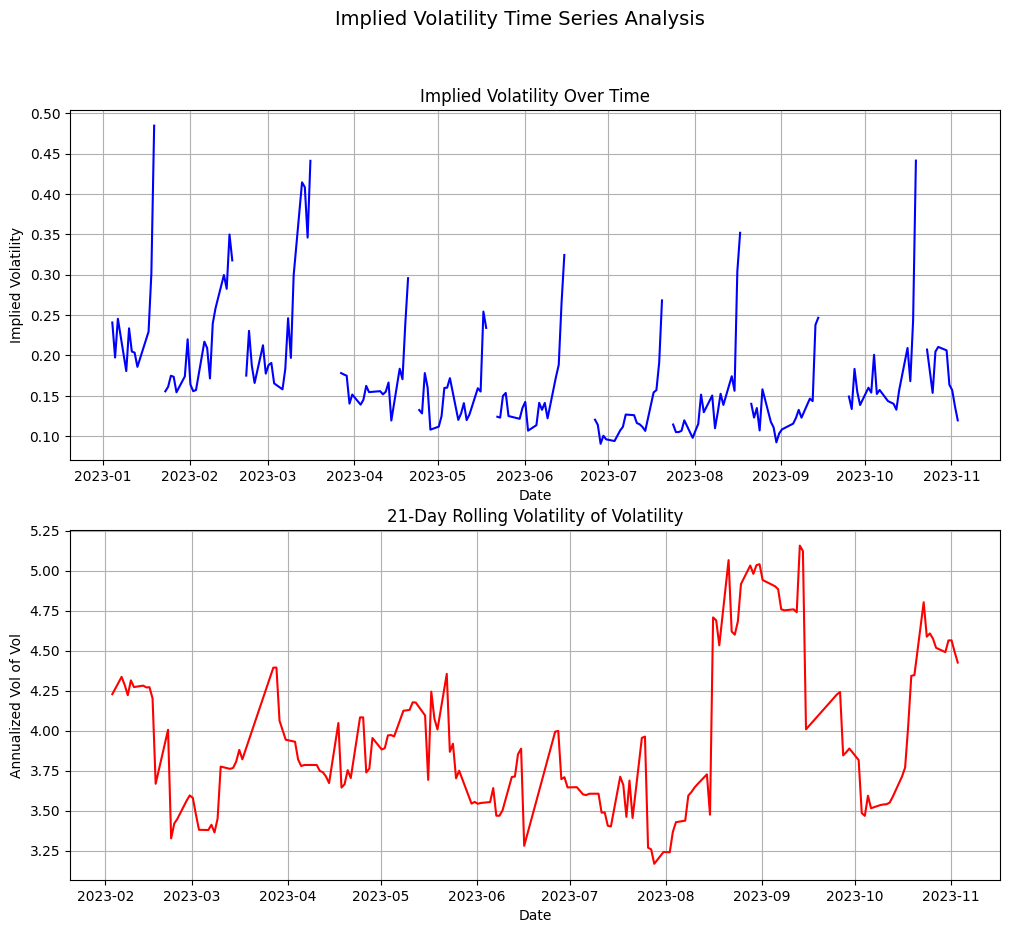

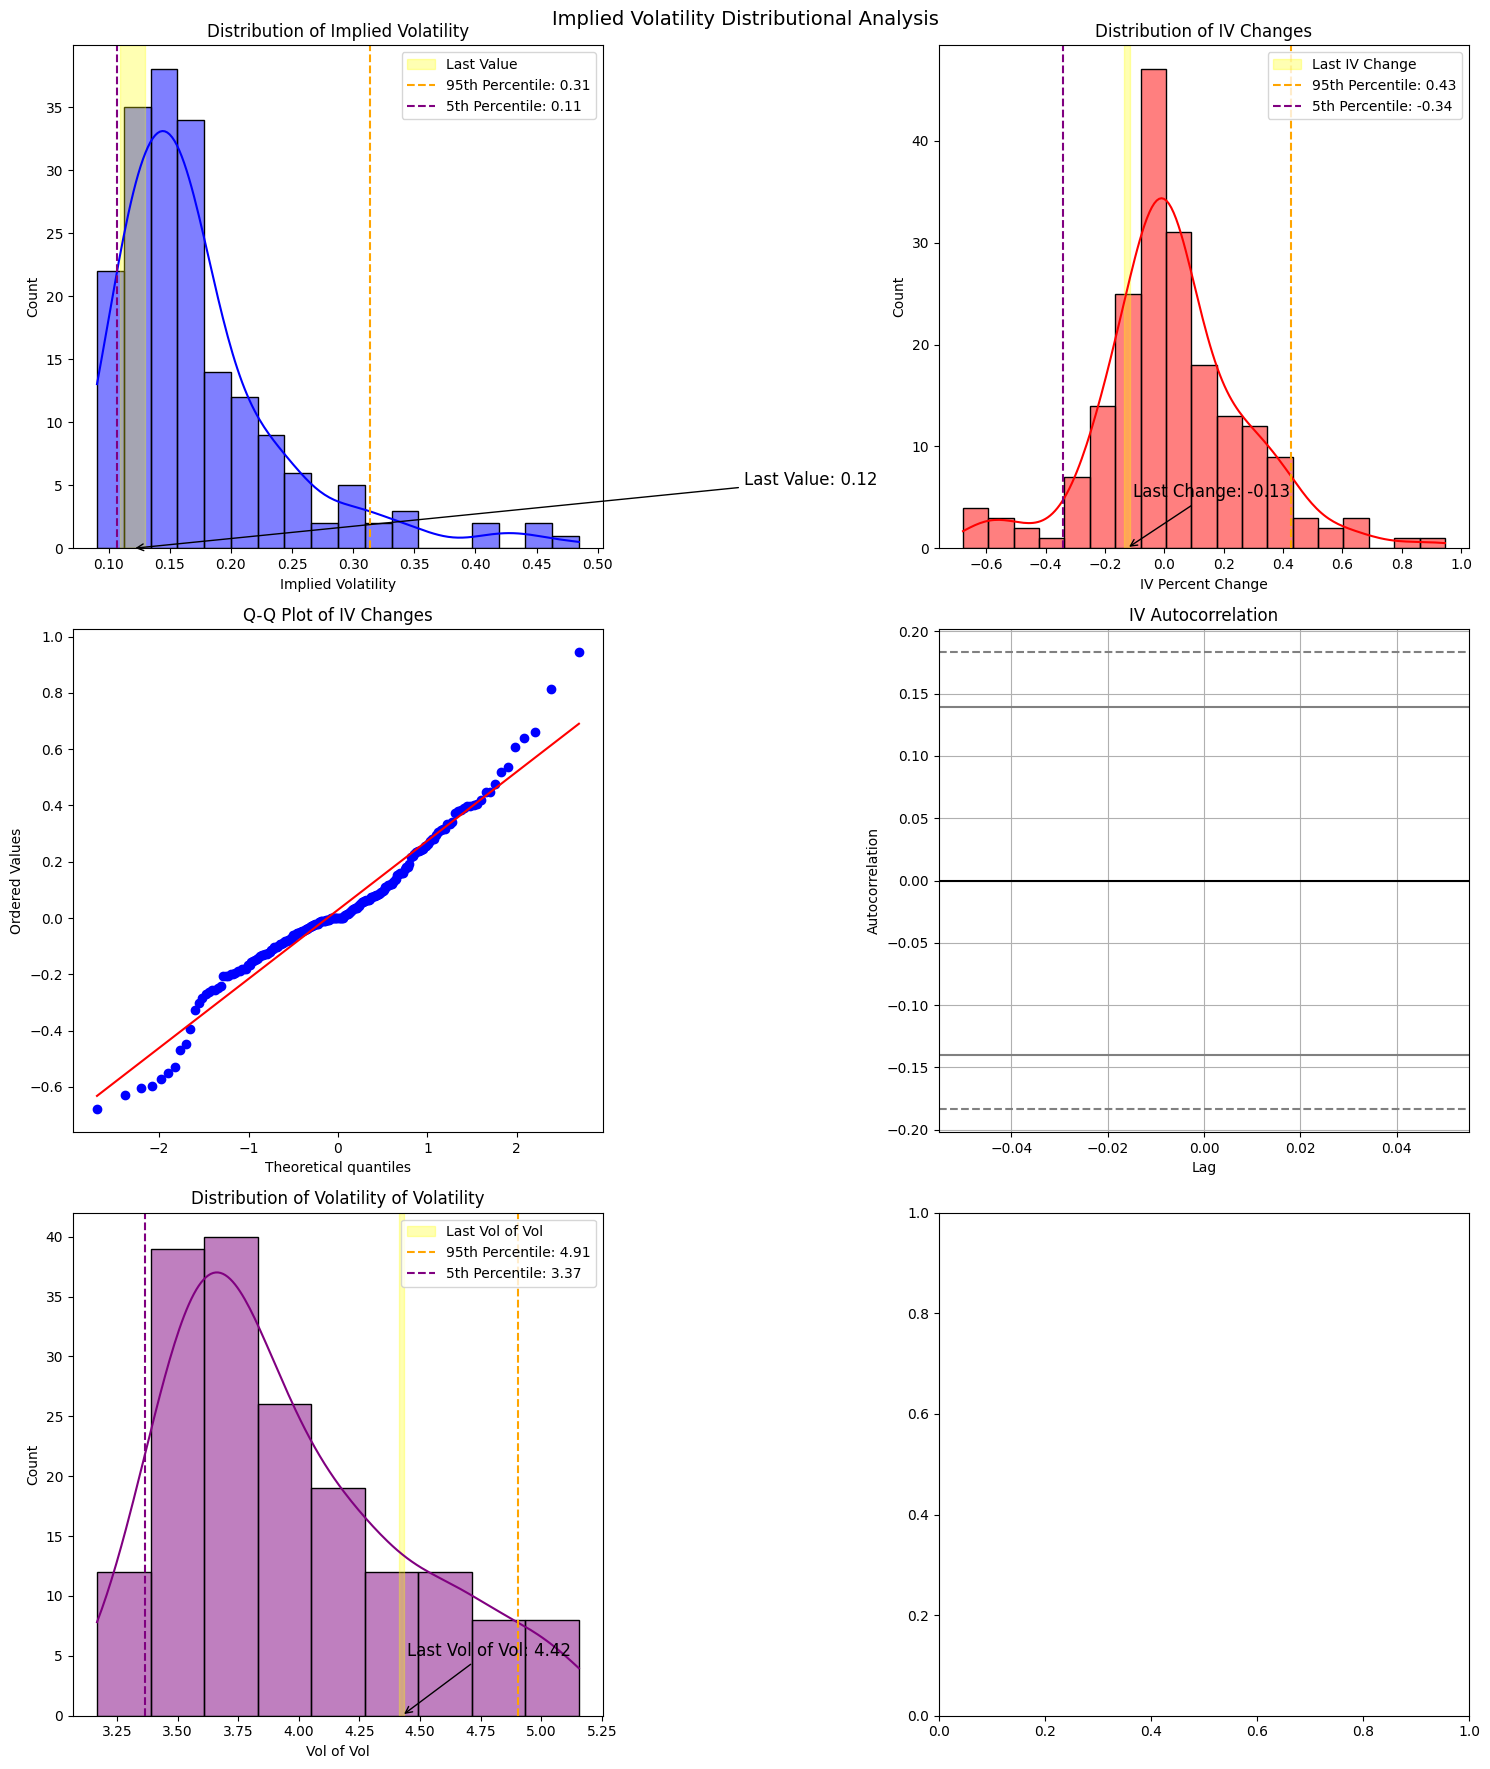

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from typing import Tuple, Dict

class IVAnalysis:
    def __init__(self, data: pd.DataFrame):
        """
        Initialize with IV time series data.
        
        Args:
            data: DataFrame with timestamp and implied_volatility columns
        """
        self.data = data.copy()
        self.data['iv_pct_change'] = self.data['implied_volatility'].pct_change()
        self.data['iv_abs_change'] = self.data['implied_volatility'].diff()
        
    def calculate_stats(self) -> Dict[str, float]:
        """Calculate key statistics for IV levels and changes."""
        iv = self.data['implied_volatility'].dropna()
        iv_changes = self.data['iv_pct_change'].dropna()
        
        stats_dict = {
            # IV Level Statistics
            'iv_mean': iv.mean(),
            'iv_median': iv.median(),
            'iv_std': iv.std(),
            'iv_skew': iv.skew(),
            'iv_kurtosis': iv.kurtosis(),
            
            # IV Changes Statistics
            'iv_changes_mean': iv_changes.mean(),
            'iv_changes_std': iv_changes.std(),
            'iv_changes_skew': iv_changes.skew(),
            'iv_changes_kurtosis': iv_changes.kurtosis(),
            
            # Volatility of Volatility
            'vol_of_vol': iv_changes.std() * np.sqrt(252),
            
            # Range Statistics
            'iv_range': iv.max() - iv.min(),
            'iv_iqr': stats.iqr(iv),
            
            # Extremes
            'iv_95_percentile': np.percentile(iv, 95),
            'iv_5_percentile': np.percentile(iv, 5)
        }
        
        return stats_dict

    def plot_analysis(self) -> Tuple[plt.Figure, plt.Figure]:
        """Create comprehensive visualization of IV analysis."""
        # Set up the first figure - Time series analysis
        fig1, axs1 = plt.subplots(2, 1, figsize=(12, 10))
        fig1.suptitle('Implied Volatility Time Series Analysis', fontsize=14)
        
        # Plot 1: IV levels over time
        axs1[0].plot(self.data['timestamp'], self.data['implied_volatility'], 
                    label='IV', color='blue')
        axs1[0].set_title('Implied Volatility Over Time')
        axs1[0].set_xlabel('Date')
        axs1[0].set_ylabel('Implied Volatility')
        axs1[0].grid(True)
        
        # Calculate vol of vol (21D rolling std * sqrt(252) to annualize)
        self.data['vol_of_vol'] = self.data['iv_pct_change'].rolling(window=21).std() * np.sqrt(252)
        
        # Plot 2: Rolling vol of vol
        axs1[1].plot(self.data['timestamp'], self.data['vol_of_vol'], 
                    label='21D Rolling Vol of Vol', color='red')
        axs1[1].set_title('21-Day Rolling Volatility of Volatility')
        axs1[1].set_xlabel('Date')
        axs1[1].set_ylabel('Annualized Vol of Vol')
        axs1[1].grid(True)
        
        # Set up the second figure - Distributional analysis
        fig2, axs2 = plt.subplots(3, 2, figsize=(15, 18))  # Added a third row for vol of vol
        fig2.suptitle('Implied Volatility Distributional Analysis', fontsize=14)
        
        # Get the last data points
        last_iv = self.data['implied_volatility'].dropna().iloc[-1]
        last_iv_change = self.data['iv_pct_change'].dropna().iloc[-1]
        last_vol_of_vol = self.data['vol_of_vol'].dropna().iloc[-1]
        
        # Calculate percentiles
        iv = self.data['implied_volatility'].dropna()
        iv_changes = self.data['iv_pct_change'].dropna()
        vol_of_vol = self.data['vol_of_vol'].dropna()
        
        iv_95_percentile = np.percentile(iv, 95)
        iv_5_percentile = np.percentile(iv, 5)
        
        iv_changes_95_percentile = np.percentile(iv_changes, 95)
        iv_changes_5_percentile = np.percentile(iv_changes, 5)
        
        vol_of_vol_95_percentile = np.percentile(vol_of_vol, 95)
        vol_of_vol_5_percentile = np.percentile(vol_of_vol, 5)
        
        # Plot 1: IV levels histogram
        sns.histplot(data=self.data, x='implied_volatility', ax=axs2[0, 0], kde=True, color='blue')
        axs2[0, 0].set_title('Distribution of Implied Volatility')
        axs2[0, 0].set_xlabel('Implied Volatility')
        
        # Add shaded area for last observation
        axs2[0, 0].axvspan(last_iv - 0.01, last_iv + 0.01, color='yellow', alpha=0.3, label="Last Value")

        # Add vertical lines for percentiles
        axs2[0, 0].axvline(iv_95_percentile, color='orange', linestyle='--', label=f'95th Percentile: {iv_95_percentile:.2f}')
        axs2[0, 0].axvline(iv_5_percentile, color='purple', linestyle='--', label=f'5th Percentile: {iv_5_percentile:.2f}')
        
        # Add arrow annotation for the last value
        axs2[0, 0].annotate(f'Last Value: {last_iv:.2f}', xy=(last_iv, 0), xytext=(last_iv + 0.5, 5),
                            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)
        
        axs2[0, 0].legend()
        
        # Plot 2: IV changes histogram
        sns.histplot(data=self.data, x='iv_pct_change', ax=axs2[0, 1], kde=True, color='red')
        axs2[0, 1].set_title('Distribution of IV Changes')
        axs2[0, 1].set_xlabel('IV Percent Change')

        # Shaded area and annotation for IV changes
        axs2[0, 1].axvspan(last_iv_change - 0.01, last_iv_change + 0.01, color='yellow', alpha=0.3, label="Last IV Change")
        axs2[0, 1].annotate(f'Last Change: {last_iv_change:.2f}', xy=(last_iv_change, 0), xytext=(last_iv_change + 0.02, 5),
                            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

        axs2[0, 1].axvline(iv_changes_95_percentile, color='orange', linestyle='--', label=f'95th Percentile: {iv_changes_95_percentile:.2f}')
        axs2[0, 1].axvline(iv_changes_5_percentile, color='purple', linestyle='--', label=f'5th Percentile: {iv_changes_5_percentile:.2f}')
        axs2[0, 1].legend()
        
        # Plot 3: QQ plot of IV changes
        stats.probplot(self.data['iv_pct_change'].dropna(), dist="norm", plot=axs2[1, 0])
        axs2[1, 0].set_title('Q-Q Plot of IV Changes')
        
        # Plot 4: IV Autocorrelation
        pd.plotting.autocorrelation_plot(self.data['implied_volatility'], ax=axs2[1, 1])
        axs2[1, 1].set_title('IV Autocorrelation')
        
        # Plot 5: Vol of vol histogram
        sns.histplot(data=self.data, x='vol_of_vol', ax=axs2[2, 0], kde=True, color='purple')
        axs2[2, 0].set_title('Distribution of Volatility of Volatility')
        axs2[2, 0].set_xlabel('Vol of Vol')
        
        # Shaded area and annotation for Vol of Vol
        axs2[2, 0].axvspan(last_vol_of_vol - 0.01, last_vol_of_vol + 0.01, color='yellow', alpha=0.3, label="Last Vol of Vol")
        axs2[2, 0].annotate(f'Last Vol of Vol: {last_vol_of_vol:.2f}', xy=(last_vol_of_vol, 0), xytext=(last_vol_of_vol + 0.02, 5),
                            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)
        
        axs2[2, 0].axvline(vol_of_vol_95_percentile, color='orange', linestyle='--', label=f'95th Percentile: {vol_of_vol_95_percentile:.2f}')
        axs2[2, 0].axvline(vol_of_vol_5_percentile, color='purple', linestyle='--', label=f'5th Percentile: {vol_of_vol_5_percentile:.2f}')
        axs2[2, 0].legend()
        
        plt.tight_layout()
        return fig1, fig2

    
    def run_analysis(self) -> Tuple[Dict[str, float], Tuple[plt.Figure, plt.Figure]]:
        """Run complete analysis and return statistics and plots."""
        stats = self.calculate_stats()
        figs = self.plot_analysis()
        return stats, figs

# Run analysis on the subset data
def analyze_iv_data(subset):
    analyzer = IVAnalysis(subset)
    stats, (fig1, fig2) = analyzer.run_analysis()
    
    # Print formatted statistics
    print("\nImplied Volatility Analysis Statistics:")
    print("-" * 40)
    for key, value in stats.items():
        print(f"{key:20}: {value:.4f}")
    
    return stats, fig1, fig2

# Execute analysis
stats, fig1, fig2 = analyze_iv_data(subset)
plt.show()

# probability/distribution analysis

In [20]:
class ProbabilityAnalysis:
    def __init__(self, data: pd.DataFrame):
        """
        Initialize with IV time series data.
        
        Args:
            data: DataFrame with timestamp and implied_volatility columns.
        """
        self.data = data.copy()
        self.data['iv_pct_change'] = self.data['implied_volatility'].pct_change()
        self.data['iv_abs_change'] = self.data['implied_volatility'].diff()
    
    def calculate_empirical_probabilities(self) -> Dict[str, float]:
        """
        Calculate the empirical probabilities for IV being in the tails (e.g., < 5% or > 95%).
        
        Returns:
            A dictionary containing empirical probabilities for tails.
        """
        iv = self.data['implied_volatility'].dropna()
        iv_95_percentile = np.percentile(iv, 95)
        iv_5_percentile = np.percentile(iv, 5)
        
        # Empirical probabilities
        below_5_percentile = (iv < iv_5_percentile).mean()
        above_95_percentile = (iv > iv_95_percentile).mean()
        within_middle_90 = ((iv >= iv_5_percentile) & (iv <= iv_95_percentile)).mean()

        prob_stats = {
            'below_5_percentile': below_5_percentile,
            'above_95_percentile': above_95_percentile,
            'within_middle_90': within_middle_90
        }
        
        return prob_stats

    def calculate_mean_reversion_speed(self) -> Dict[str, float]:
        """
        Estimate the speed of mean reversion using autocorrelation-based half-life.
        
        Returns:
            A dictionary containing the speed of mean reversion (half-life).
        """
        iv = self.data['implied_volatility'].dropna()

        # Compute autocorrelation lag-1
        iv_lag1 = iv.shift(1).dropna()
        iv_truncated = iv[1:]  # Exclude first row
        autocorr = iv_truncated.corr(iv_lag1)

        # Calculate half-life based on autocorrelation formula
        if autocorr != 0:
            half_life = -np.log(2) / np.log(autocorr)
        else:
            half_life = np.inf  # No mean reversion detected

        reversion_stats = {
            'autocorrelation': autocorr,
            'half_life_days': half_life
        }
        
        return reversion_stats

    def calculate_conditional_probabilities(self) -> Dict[str, float]:
        """
        Calculate conditional probabilities for volatility events (e.g., given an increase, what's the probability of a subsequent increase).
        
        Returns:
            A dictionary of conditional probability statistics.
        """
        iv_changes = self.data['iv_pct_change'].dropna()

        # Define thresholds for large changes (e.g., greater than 1 standard deviation)
        threshold = iv_changes.std()

        large_increase = iv_changes > threshold
        large_decrease = iv_changes < -threshold

        # Probability of large increase given previous large increase
        prob_increase_given_increase = (large_increase & large_increase.shift(1)).mean()

        # Probability of large decrease given previous large increase
        prob_decrease_given_increase = (large_decrease & large_increase.shift(1)).mean()

        conditional_stats = {
            'prob_increase_given_increase': prob_increase_given_increase,
            'prob_decrease_given_increase': prob_decrease_given_increase,
        }

        return conditional_stats

    def run_probability_analysis(self) -> pd.DataFrame:
        """
        Run the complete probability analysis and return the results in a DataFrame.
        
        Returns:
            A pandas DataFrame containing all computed statistics.
        """
        # Run all calculations
        empirical_probabilities = self.calculate_empirical_probabilities()
        mean_reversion_speed = self.calculate_mean_reversion_speed()
        conditional_probabilities = self.calculate_conditional_probabilities()

        # Combine results into a single dictionary for table-like output
        results = {
            'Statistic': [
                'Empirical Probability (Below 5% Tail)', 
                'Empirical Probability (Above 95% Tail)', 
                'Empirical Probability (Within Middle 90%)', 
                'Autocorrelation (Lag 1)', 
                'Mean Reversion Half-life (Days)', 
                'Prob. Increase Given Previous Increase', 
                'Prob. Decrease Given Previous Increase'
            ],
            'Value': [
                empirical_probabilities['below_5_percentile'], 
                empirical_probabilities['above_95_percentile'], 
                empirical_probabilities['within_middle_90'], 
                mean_reversion_speed['autocorrelation'], 
                mean_reversion_speed['half_life_days'], 
                conditional_probabilities['prob_increase_given_increase'], 
                conditional_probabilities['prob_decrease_given_increase']
            ]
        }

        # Create a DataFrame from the results dictionary
        results_df = pd.DataFrame(results)

        return results_df

# Example usage:
data = subset
analyzer = ProbabilityAnalysis(data)
probability_results_table = analyzer.run_probability_analysis()
print(probability_results_table)



                                   Statistic     Value
0      Empirical Probability (Below 5% Tail)  0.053476
1     Empirical Probability (Above 95% Tail)  0.053476
2  Empirical Probability (Within Middle 90%)  0.893048
3                    Autocorrelation (Lag 1)  0.603070
4            Mean Reversion Half-life (Days)  1.370607
5     Prob. Increase Given Previous Increase  0.015306
6     Prob. Decrease Given Previous Increase  0.010204


C:\Users\mbeckhusen\AppData\Local\Temp\ipykernel_64244\1613837923.py:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  self.data['iv_pct_change'] = self.data['implied_volatility'].pct_change()


C:\Users\mbeckhusen\AppData\Local\Temp\ipykernel_64244\1920217603.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Statistic', data=results_df, palette='Blues_d')


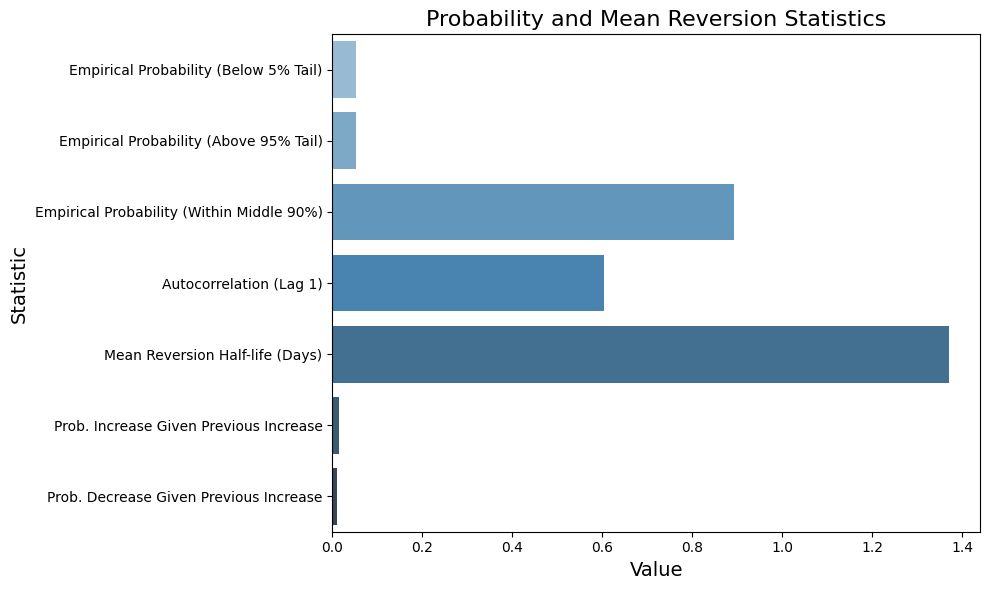

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_statistics_bar_chart(results_df: pd.DataFrame):
    """
    Plot the statistics in a bar chart format.
    
    Args:
        results_df: DataFrame with statistics to visualize.
    """
    # Set plot size
    plt.figure(figsize=(10, 6))
    
    # Create a bar plot
    sns.barplot(x='Value', y='Statistic', data=results_df, palette='Blues_d')
    
    # Add labels and title
    plt.title('Probability and Mean Reversion Statistics', fontsize=16)
    plt.xlabel('Value', fontsize=14)
    plt.ylabel('Statistic', fontsize=14)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
probability_results_table = analyzer.run_probability_analysis()
plot_statistics_bar_chart(probability_results_table)


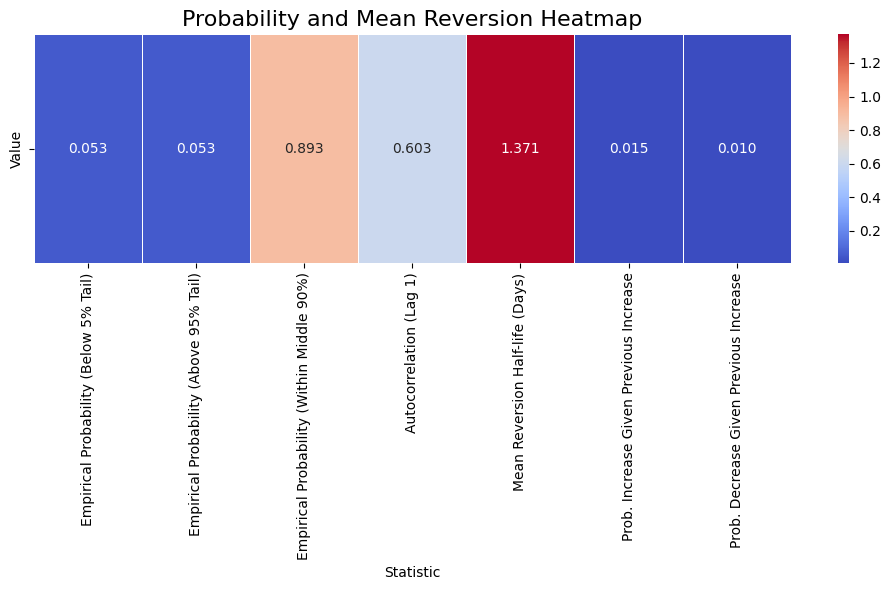

In [22]:
def plot_statistics_heatmap(results_df: pd.DataFrame):
    """
    Plot the statistics as a heatmap for visualizing magnitudes.
    
    Args:
        results_df: DataFrame with statistics to visualize.
    """
    # Set plot size
    plt.figure(figsize=(10, 6))
    
    # Use seaborn's heatmap
    sns.heatmap(
        results_df.set_index('Statistic').T, 
        annot=True, cmap='coolwarm', cbar=True, linewidths=0.5, fmt='.3f'
    )
    
    # Add title
    plt.title('Probability and Mean Reversion Heatmap', fontsize=16)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
plot_statistics_heatmap(probability_results_table)


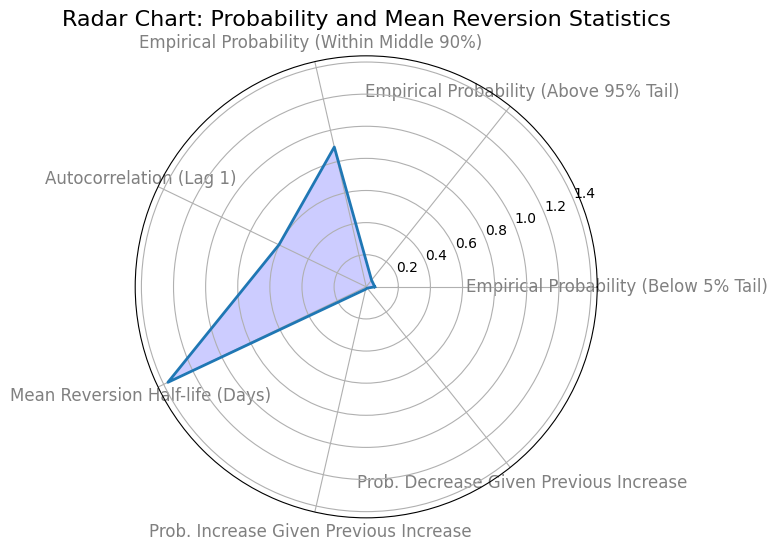

In [23]:
import numpy as np
from math import pi

def plot_statistics_radar_chart(results_df: pd.DataFrame):
    """
    Plot the statistics in a radar chart format.
    
    Args:
        results_df: DataFrame with statistics to visualize.
    """
    # Prepare data for radar plot
    categories = list(results_df['Statistic'])
    values = results_df['Value'].values.flatten().tolist()

    N = len(categories)
    
    # Compute angle for each category
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # The values need to be repeated to close the radar chart
    values += values[:1]

    # Initialize radar plot
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Draw one axe per variable
    plt.xticks(angles[:-1], categories, color='grey', size=12)

    # Plot data
    ax.plot(angles, values, linewidth=2, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.2)

    # Set the title
    plt.title('Radar Chart: Probability and Mean Reversion Statistics', size=16)

    plt.show()

# Example usage:
plot_statistics_radar_chart(probability_results_table)
